In [272]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torch.utils.data as utils
#from torch.utils.data.sampler import SubsetRandomSampler, Sampler

from torchvision import transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

соберем данные в один датафрейм.

In [274]:
dict={'DATE':[],'EPS_MEAN_EST':[],'EPS_ACT':[],'EPS_ACT_ADJ':[] ,
     'EPS_AMT_DIFF_SURP':[],'EPS_PCT_DIFF_SURP':[],'EPS_STD_EST':[] ,
     'EPS_CNT_EST':[], 'FISC_YEAR':[], 'FISC_QTR':[], 'CAL_YEAR':[] ,
    'CAL_QTR':[], 'PER_END_DATE':[], 'PER_CODE':[],'company':[]}
df=pd.DataFrame(data=dict)
path = 'C:/Users/LUBOV/dlcourse_ai/assignments/assignment1/data_new/Test_case/EPS_data/'
for filename in glob.glob((os.path.join(path, '*.csv'))):
    name=filename.replace(path.replace('EPS_data/','EPS_data\\'),'').replace('.csv','')
    data = pd.read_csv(filename)
    if data.shape[0]>0:
        data['company']= name
        df=pd.concat([df,data],ignore_index=True,sort=True)
df.head()

,CAL_QTR,CAL_YEAR,DATE,EPS_ACT,EPS_ACT_ADJ,EPS_AMT_DIFF_SURP,EPS_CNT_EST,EPS_MEAN_EST,EPS_PCT_DIFF_SURP,EPS_STD_EST,FISC_QTR,FISC_YEAR,PER_CODE,PER_END_DATE,company
0,1.0,2019.0,2019-04-18,2.01,0.21,0.01,8.0,2.00,0.50,0.04,1.0,2019.0,NaN,20190331.0,ZES-AXP
1,4.0,2018.0,2019-01-17,1.74,-0.58,-0.06,9.0,1.80,-3.33,0.04,4.0,2018.0,NaN,20181231.0,ZES-AXP
2,3.0,2018.0,2018-10-18,1.88,0.00,0.10,9.0,1.78,5.62,0.02,3.0,2018.0,NaN,20180930.0,ZES-AXP
3,2.0,2018.0,2018-07-18,1.84,0.00,0.01,9.0,1.83,0.55,0.06,2.0,2018.0,NaN,20180630.0,ZES-AXP
4,1.0,2018.0,2018-04-18,1.86,0.00,0.15,11.0,1.71,8.77,0.06,1.0,2018.0,NaN,20180331.0,ZES-AXP


In [ ]:
смотрим на распределение величин: распределение EPS, распределение ошибки в прогнозах

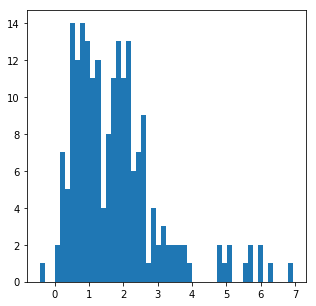

In [285]:
df['EPS_ACT'].hist(bins=50,grid=False, figsize=(5, 5))

похоже на три гауссова распределениясо средним 1 и 2 и 5

In [280]:
df['EPS_AMT_DIFF_SURP']=pd.to_numeric(df['EPS_AMT_DIFF_SURP'])
df['EPS_PCT_DIFF_SURP']=pd.to_numeric(df['EPS_PCT_DIFF_SURP'])
df['EPS_ACT']=pd.to_numeric(df['EPS_ACT'])  

In [281]:
df.groupby(['company']).agg({'EPS_PCT_DIFF_SURP':[np.mean, np.std,np.min, np.max],'EPS_AMT_DIFF_SURP':[np.mean, np.std,np.min, np.max]}).sort_values(('EPS_PCT_DIFF_SURP', 'mean'),ascending=False)

EPS_PCT_DIFF_SURP                           EPS_AMT_DIFF_SURP  \
                      mean        std   amin    amax              mean   
company                                                                  
ZES-CAT          24.715000  31.649181 -14.43  106.45          0.261667   
ZES-BA           19.662500  22.401684  -3.48   64.95          0.485000   
ZES-GS           17.760000   9.033875  -4.28   28.05          0.790000   
ZES-NKE          17.398333   9.821778   2.08   30.77          0.088333   
ZES-TRV          15.811667  43.253453 -25.51  139.47          0.106667   
ZES-INTC         11.836667   9.454495   1.54   26.25          0.099167   
ZES-UTX           8.350833   7.890849   0.00   29.14          0.134167   
ZES-JPM           7.680833   7.850893 -10.00   20.42          0.125833   
ZES-V             7.002500   3.249162   0.83   11.11          0.065000   
ZES-GE            6.076667  27.613386 -40.82   55.56         -0.004167   
ZES-AXP           4.460000   9.067850  -7.14   29.17          0.061667   
ZES-UNH           3.860000   1.660958   1.93    8.72          0.100000   
ZES-PG            3.721667   2.251371   1.87    8.97          0.035000   
ZES-JNJ           2.460833   1.429237   0.99    5.56          0.045000   
ZES-KO            2.321667   1.998863  -2.27    5.45          0.011667   
ZES-VZ            1.075000   2.933426  -3.37    5.41          0.013333   
ZES-MMM           0.030000   4.268321 -10.80    5.43         -0.005000   

                                
               std  amin  amax  
company                         
ZES-CAT   0.331274 -0.43  0.73  
ZES-BA    0.593732 -0.12  1.89  
ZES-GS    0.431888 -0.23  1.31  
ZES-NKE   0.051316  0.01  0.17  
ZES-TRV   0.392760 -0.62  0.76  
ZES-INTC  0.085754  0.01  0.25  
ZES-UTX   0.118126  0.00  0.44  
ZES-JPM   0.140224 -0.22  0.33  
ZES-V     0.032333  0.01  0.12  
ZES-GE    0.070770 -0.20  0.05  
ZES-AXP   0.101160 -0.07  0.28  
ZES-UNH   0.037173  0.04  0.19  
ZES-PG    0.016237  0.02  0.07  
ZES-JNJ   0.025761  0.02  0.10  
ZES-KO    0.010299 -0.01  0.03  
ZES-VZ    0.030847 -0.03  0.06  
ZES-MMM   0.102824 -0.27  0.12

основная ошибка приходится на GS, BA,CAT,TRV. посмотрим на их распределение EPS

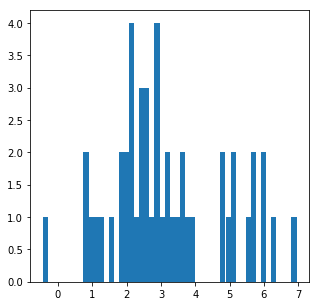

In [287]:
bad_est= (df['company']=='ZES-GS')| (df['company']=='ZES-BA')|( df['company']=='ZES-CAT')|( df['company']=='ZES-TRV')
df[bad_est]['EPS_ACT'].hist(bins=50,grid=False, figsize=(5, 5))

смотрим на распределение ошибок в прогнозах 

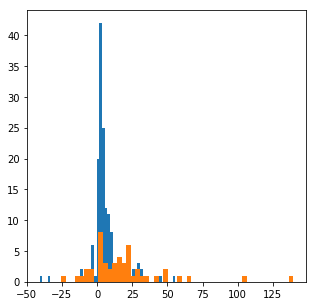

In [292]:
df.loc[~df['company'].isin(['ZES-GS','ZES-BA','ZES-CAT','ZES-TRV'])]['EPS_PCT_DIFF_SURP'].hist(bins=50,grid=False, figsize=(5, 5))
#good_est= (df['company']!='ZES-GS')| (df['company']!='ZES-BA')|( df['company']!='ZES-CAT')|( df['company']!='ZES-TRV')
df.loc[df['company'].isin(['ZES-GS','ZES-BA','ZES-CAT','ZES-TRV'])]['EPS_PCT_DIFF_SURP'].hist(bins=50,grid=False, figsize=(5, 5))

пробуем линейную регрессию от EPS(t-1), ошибка по МНК регрессии больше, чем для прогнознозов (EPS_MEAN_EST)

In [324]:
n_f=1
X=np.asarray([])
Xb=np.asarray([])
Y=np.asarray([])
Yb=np.asarray([])
ESTb=np.asarray([])
EST_=np.asarray([])

for company, sub_df in df.groupby(['company']):
    XX=np.asarray(sub_df['EPS_ACT'].shift(-1))
    YY=np.asarray(sub_df['EPS_ACT'])
    EST=np.asarray(sub_df['EPS_MEAN_EST'])
    
    XX=np.delete(XX,np.s_[XX.shape[0]-1:XX.shape[0]:1],0)   
    YY=np.delete(YY,np.s_[YY.shape[0]-1:YY.shape[0]:1],0)
    EST=np.delete(EST,np.s_[EST.shape[0]-1:EST.shape[0]:1],0)
    
    if (company=='ZES-GS')|(company=='ZES-BA')|(company=='ZES-CAT')|(company=='ZES-TRV'):
        Xb=np.hstack([Xb,XX])
        Yb=np.hstack([Yb,YY])
        ESTb=np.hstack([ESTb,EST])
        
    else:
        X=np.hstack([X,XX])
        Y=np.hstack([Y,YY])
        EST_=np.hstack([EST_,EST])

1.014850717597364 0.022281091131331608


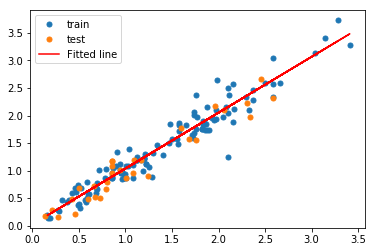

In [328]:
x_train, x_test, y_train, y_test, est_train,est_test = train_test_split(X, Y,EST_ ,test_size=0.2, random_state=42)

A = np.vstack([x_train, np.ones(len(x_train))]).T
p, l = np.linalg.lstsq(A,y_train,rcond=None)[0]
print(p, l)
#Plot the data along with the fitted line:
plt.plot(x_train, y_train, 'o', label='train', markersize=5)
plt.plot(x_test, y_test, 'o', label='test', markersize=5)
plt.plot(x_train, bp*x_train+ bl, 'r', label='Fitted line')
plt.legend()
plt.show()

In [329]:
((est_test-y_test)**2).sum()

0.2733000000000001

In [330]:
((p*x_test+l-y_test)**2).sum()

1.118274579923999

1.014850717597364 0.022281091131331608


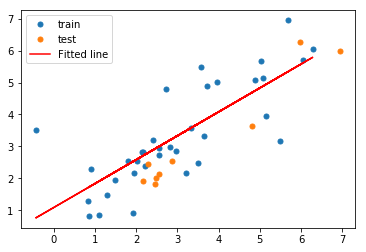

In [331]:
x_train, x_test, y_train, y_test, est_train,est_test = train_test_split(Xb, Yb,ESTb ,test_size=0.2, random_state=42)

A = np.vstack([x_train, np.ones(len(x_train))]).T
p, l = np.linalg.lstsq(A,y_train,rcond=None)[0]
print(bp, bl)
#Plot the data along with the fitted line:
plt.plot(x_train, y_train, 'o', label='train', markersize=5)
plt.plot(x_test, y_test, 'o', label='test', markersize=5)
plt.plot(x_train, p*x_train+ l, 'r', label='Fitted line')
plt.legend()
plt.show()

In [332]:
((est_test-y_test)**2).sum()

4.230900000000003

In [333]:
((bp*x_test+bl-y_test)**2).sum()

4.042287438563853

Добавим еще одну переменную EPS_ACT(t-2)

In [336]:
n_f=2
X=np.asarray([]).reshape(-1,n_f)
Xb=np.asarray([]).reshape(-1,n_f)
Y=np.asarray([])
Yb=np.asarray([])
ESTb=np.asarray([])
EST_=np.asarray([])

for company, sub_df in df.groupby(['company']):
    XX=np.vstack([np.asarray(sub_df['EPS_ACT'].shift(-2)),np.asarray(sub_df['EPS_ACT'].shift(-1))]).T
    YY=np.asarray(sub_df['EPS_ACT'])
    EST=np.asarray(sub_df['EPS_MEAN_EST'])
    
    XX=np.delete(XX,np.s_[XX.shape[0]-2:XX.shape[0]:1],0)   
    YY=np.delete(YY,np.s_[YY.shape[0]-2:YY.shape[0]:1],0)
    EST=np.delete(EST,np.s_[EST.shape[0]-2:EST.shape[0]:1],0)
    
    if (company=='ZES-GS')|(company=='ZES-BA')|(company=='ZES-CAT')|(company=='ZES-TRV'):
        Xb=np.vstack([Xb,XX])
        Yb=np.hstack([Yb,YY])
        ESTb=np.hstack([ESTb,EST])
        
    else:
        X=np.vstack([X,XX])
        Y=np.hstack([Y,YY])
        EST_=np.hstack([EST_,EST])

In [359]:
x_train, x_test, y_train, y_test, est_train,est_test = train_test_split(X, Y,EST_ ,test_size=0.2, random_state=42)
A = np.vstack([x_train.T, np.ones(x_train.shape[0])]).T
m,a,c = np.linalg.lstsq(A,y_train,rcond=None)[0]
print(m,a, c)
print(((est_test-y_test)**2).sum(),((m*x_test.T[0]+a*x_test.T[1]+c-y_test)**2).sum())

0.11122139947356813 0.9125448875227068 0.005289513425104031
0.2640000000000001 0.9948160783500322


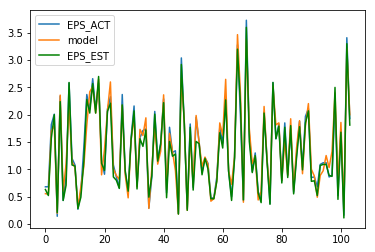

In [360]:
plt.plot(y_train,label='EPS_ACT')
plt.plot(m*x_train.T[0]+a*x_train.T[1]+c,label='model')
plt.plot(est_train,'g',label='EPS_EST')
plt.legend()
plt.show()

In [368]:
x_train, x_test, y_train, y_test, est_train,est_test = train_test_split(Xb, Yb,ESTb ,test_size=0.2, random_state=42)
A = np.vstack([x_train.T, np.ones(x_train.shape[0])]).T
mb,ab,cb = np.linalg.lstsq(A,y_train,rcond=None)[0]
print(m,a, c)
print(((est_test-y_test)**2).sum(),((mb*x_test.T[0]+ab*x_test.T[1]+cb-y_test)**2).sum())

0.11122139947356813 0.9125448875227068 0.005289513425104031
2.695500000000001 3.337972332281318


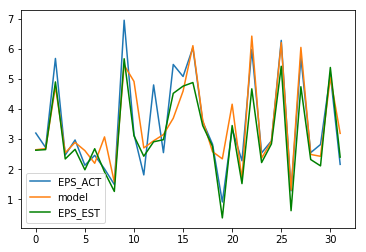

In [369]:
plt.plot(y_train,label='EPS_ACT')
plt.plot(mb*x_train.T[0]+ab*x_train.T[1]+cb,label='model')
plt.plot(est_train,'g',label='EPS_EST')
plt.legend()
plt.show()

In [373]:
Xall_pred=np.asarray([]).reshape(-1,2)

for company, sub_df in df.groupby(['company']):
    XX=np.vstack([np.asarray(sub_df['EPS_ACT'].shift(-1)),np.asarray(sub_df['EPS_ACT'])]).T[0]
        
    Xall_pred=np.vstack([Xall_pred,XX])
    comp=np.append(comp,company)
    if (company=='ZES-GS')|(company=='ZES-BA')|(company=='ZES-CAT')|(company=='ZES-TRV'):
        model0_=mb*XX.T[0]+ab*XX.T[1]+cb
        print(XX.T[0],model0_)
    else:
        model0_=m*XX.T[0]+a*XX.T[1]+c
        print(XX.T[0],model0_)
        
    model0=np.append(model0,model0_)

1.74 2.033029972429753
5.48 4.06798979746131
2.55 3.076022268893982
0.17 0.1519534355887896
6.04 5.776991963692769
1.28 0.9598178546464804
1.97 2.1407399341857176
1.98 2.643751836317942
0.43 0.4911362612096376
2.31 2.2971860453846826
0.52 0.6836551646668001
1.25 1.1116138435411336
2.13 2.886292450928946
3.28 3.773888134158104
1.95 1.9651319775669318
1.3 1.3453111353954887
1.12 1.2249113458627485


для хорошо прогнозируемой группы можно использовать регрессию, для плохо прогнозируемой -с натяжкой

Нейронная сеть. надежда на то, что нелинейность найдет закономерности и увеличит точность
тк данных немного берем самую простую полносвязную модель
Параметры для оптимизации:
1. шаг обучения. learning rate, кол-во эпох, размер батча
2. количество признаков(оптимально 4)
3. функция активации(RELU,CELU- лучше прогнозная способность)
4. нормализация батчей(ухудшает обучаемость)
5. количество внутренних слоев(большое кол-во приводит к нестабильности)
6. в качестве признаков использование изменение EPS, нормирование EPS на среднее в истории значение (обучаемость упала)

In [375]:
n_f=4
X=np.asarray([]).reshape(-1,n_f)
Xb=np.asarray([]).reshape(-1,n_f)
Y=np.asarray([])
Yb=np.asarray([])
Xall=np.asarray([]).reshape(-1,n_f)
Yall=np.asarray([])
EPS=np.asarray([])

for company, sub_df in df.groupby(['company']):
    XX=np.vstack([np.asarray(sub_df['EPS_ACT'].shift(-4)),np.asarray(sub_df['EPS_ACT'].shift(-3)), 
                  np.asarray(sub_df['EPS_ACT'].shift(-2)),np.asarray(sub_df['EPS_ACT'].shift(-1))]).T   
    
    YY=np.asarray(sub_df['EPS_ACT'])
    EPS_=np.asarray(sub_df['EPS_MEAN_EST'])   
    
 
    XX=np.delete(XX,np.s_[XX.shape[0]-4:XX.shape[0]:1],0)   
    YY=np.delete(YY,np.s_[YY.shape[0]-4:YY.shape[0]:1],0)
    EPS_=np.delete(EPS_,np.s_[EPS_.shape[0]-4:EPS_.shape[0]:1],0)  
    EPS=np.hstack([EPS,EPS_])
    
    if (company=='ZES-GS')|(company=='ZES-BA')|(company=='ZES-CAT')|(company=='ZES-TRV'):
        Xb=np.vstack([Xb,XX])
        Yb=np.hstack([Yb,YY])
        Xall=np.vstack([Xall,XX])
        Yall=np.hstack([Yall,YY])
    else:
        X=np.vstack([X,XX])
        Y=np.hstack([Y,YY])
        Xall=np.vstack([Xall,XX])
        Yall=np.hstack([Yall,YY])

In [376]:
Xall= torch.as_tensor(Xall,dtype=torch.float32)
Yall= torch.as_tensor(Yall.reshape(-1,1),dtype=torch.float32)
EPS= torch.as_tensor(EPS.reshape(-1,1),dtype=torch.float32)
print(Yall.shape[0],EPS.shape[0])

136 136


In [377]:
x_trainb_2, x_testb_2, y_trainb_2, y_testb_2= train_test_split(Xb, Yb,  test_size=0.2, random_state=30)
x_train_2, x_test_2, y_train_2, y_test_2  = train_test_split(X, Y, test_size=0.2, random_state=30)
x_train_2= torch.as_tensor(np.vstack([x_train_2,x_trainb_2]),dtype=torch.float32)
y_train_2= torch.as_tensor(np.hstack([y_train_2,y_trainb_2]).reshape(-1,1),dtype=torch.float32)
x_test_2= torch.as_tensor(np.vstack([x_test_2,x_testb_2]),dtype=torch.float32)
y_test_2= torch.as_tensor(np.hstack([y_test_2,y_testb_2]).reshape(-1,1),dtype=torch.float32)

In [378]:
mean=torch.as_tensor(x_train_2.mean())
sigm=x_train_2.std()
data_train2 = utils.TensorDataset((x_train_2-mean)/sigm,y_train_2) # Создание датасета
batch_size = 5

data_size2 = x_train_2.shape[0]
validation_split = .2
split = int(np.floor(validation_split * data_size2))
indices = list(range(data_size2))
np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_sampler = utils.SubsetRandomSampler(train_indices)
val_sampler =utils.SubsetRandomSampler(val_indices)

train_loader2 = utils.DataLoader(data_train2, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader2 = utils.DataLoader(data_train2, batch_size=batch_size,
                                         sampler=val_sampler)

In [379]:
print(mean, sigm)

tensor(1.7146) tensor(1.2711)


In [380]:
def train_model(model,train_loader, val_loader, loss, optimizer, num_epochs):
    loss_history = []
    val_history = []
    for epoch in range(num_epochs):
        model.train() # Enter train mode        
        loss_accum = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            prediction = model(x)    
            loss_value = loss(prediction, y)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            total_samples += y.shape[0]            
            loss_accum += loss_value

        ave_loss = loss_accum / (i_step + 1)        
        val_loss = compute_loss(model, val_loader)
        
        loss_history.append(float(ave_loss))
        val_history.append(val_loss)
        
        print("Average loss: %f, Val loss: %f" % (ave_loss, val_loss))
        
    return loss_history, val_history


In [381]:
def compute_loss(model, loader):
    
    model.eval() # Evaluation mode
    
    total_samples =0
    loss_=torch.tensor([0])
    loss=0
    for i_step, (x, y) in enumerate(loader):        
        prediction = model(x) 
        total_samples += y.shape[0]
        loss_+= torch.sum((prediction -y)**2)
    loss=(float(loss_.item())/total_samples) 
    return loss

In [390]:
# сама модель
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = x_train_2.shape[0], n_f, 3, 1

nn_model_2 = nn.Sequential(
    #nn.BatchNorm1d(D_in),
    nn.Linear(D_in, H),
    nn.CELU(10),
    nn.Linear(H, D_out))


#МНК- функция ошибок, оптимизатор- стохастический градиентный спуск

loss= nn.MSELoss()
optimizer = optim.SGD(nn_model_2.parameters(), lr=1e-3, weight_decay=1e-1)
loss_history, val_history = train_model(nn_model_2, train_loader2, val_loader2, loss, optimizer,600)

Average loss: 7.812645, Val loss: 10.571429
Average loss: 6.984886, Val loss: 9.476190
Average loss: 6.187726, Val loss: 8.523810
Average loss: 5.612497, Val loss: 7.666667
Average loss: 4.894040, Val loss: 6.857143
Average loss: 4.432928, Val loss: 6.142857
Average loss: 3.955092, Val loss: 5.428571
Average loss: 3.417409, Val loss: 4.761905
Average loss: 3.067962, Val loss: 4.190476
Average loss: 2.603542, Val loss: 3.571429
Average loss: 2.264260, Val loss: 3.142857
Average loss: 1.869018, Val loss: 2.619048
Average loss: 1.605752, Val loss: 2.285714
Average loss: 1.467990, Val loss: 1.857143
Average loss: 1.085967, Val loss: 1.523810
Average loss: 0.909502, Val loss: 1.333333
Average loss: 0.780251, Val loss: 1.095238
Average loss: 0.642965, Val loss: 0.952381
Average loss: 0.553746, Val loss: 0.857143
Average loss: 0.473016, Val loss: 0.714286
Average loss: 0.411811, Val loss: 0.619048
Average loss: 0.370438, Val loss: 0.523810
Average loss: 0.328696, Val loss: 0.523810
Average lo

Average loss: 0.165858, Val loss: 0.190476
Average loss: 0.164980, Val loss: 0.190476
Average loss: 0.204930, Val loss: 0.190476
Average loss: 0.168088, Val loss: 0.190476
Average loss: 0.165826, Val loss: 0.190476
Average loss: 0.165687, Val loss: 0.190476
Average loss: 0.165916, Val loss: 0.190476
Average loss: 0.166397, Val loss: 0.190476
Average loss: 0.170879, Val loss: 0.190476
Average loss: 0.167854, Val loss: 0.190476
Average loss: 0.164865, Val loss: 0.190476
Average loss: 0.165367, Val loss: 0.190476
Average loss: 0.209309, Val loss: 0.142857
Average loss: 0.166664, Val loss: 0.142857
Average loss: 0.165502, Val loss: 0.190476
Average loss: 0.165798, Val loss: 0.142857
Average loss: 0.166379, Val loss: 0.142857
Average loss: 0.166165, Val loss: 0.142857
Average loss: 0.202555, Val loss: 0.190476
Average loss: 0.166336, Val loss: 0.142857
Average loss: 0.178411, Val loss: 0.142857
Average loss: 0.166486, Val loss: 0.190476
Average loss: 0.179066, Val loss: 0.190476
Average los

Average loss: 0.163100, Val loss: 0.142857
Average loss: 0.164184, Val loss: 0.142857
Average loss: 0.172767, Val loss: 0.142857
Average loss: 0.163905, Val loss: 0.142857
Average loss: 0.177622, Val loss: 0.142857
Average loss: 0.163106, Val loss: 0.142857
Average loss: 0.165376, Val loss: 0.142857
Average loss: 0.163195, Val loss: 0.142857
Average loss: 0.162713, Val loss: 0.142857
Average loss: 0.163641, Val loss: 0.142857
Average loss: 0.163756, Val loss: 0.142857
Average loss: 0.162932, Val loss: 0.142857
Average loss: 0.162515, Val loss: 0.142857
Average loss: 0.170131, Val loss: 0.190476
Average loss: 0.162965, Val loss: 0.190476
Average loss: 0.168188, Val loss: 0.142857
Average loss: 0.205433, Val loss: 0.190476
Average loss: 0.162005, Val loss: 0.190476
Average loss: 0.202752, Val loss: 0.142857
Average loss: 0.162647, Val loss: 0.190476
Average loss: 0.164751, Val loss: 0.190476
Average loss: 0.163505, Val loss: 0.142857
Average loss: 0.163763, Val loss: 0.190476
Average los

Average loss: 0.167325, Val loss: 0.142857
Average loss: 0.162587, Val loss: 0.142857
Average loss: 0.165392, Val loss: 0.095238
Average loss: 0.162757, Val loss: 0.142857
Average loss: 0.164070, Val loss: 0.142857
Average loss: 0.162729, Val loss: 0.142857
Average loss: 0.163976, Val loss: 0.142857
Average loss: 0.163171, Val loss: 0.142857
Average loss: 0.169817, Val loss: 0.142857
Average loss: 0.163173, Val loss: 0.142857
Average loss: 0.162985, Val loss: 0.142857
Average loss: 0.234548, Val loss: 0.142857
Average loss: 0.162681, Val loss: 0.142857
Average loss: 0.170096, Val loss: 0.190476
Average loss: 0.163368, Val loss: 0.142857
Average loss: 0.163738, Val loss: 0.142857
Average loss: 0.164725, Val loss: 0.142857
Average loss: 0.164204, Val loss: 0.142857
Average loss: 0.162976, Val loss: 0.190476
Average loss: 0.163534, Val loss: 0.190476
Average loss: 0.169493, Val loss: 0.142857
Average loss: 0.163559, Val loss: 0.142857
Average loss: 0.162513, Val loss: 0.142857


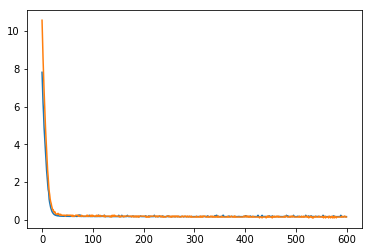

In [391]:
plt.plot(loss_history)
plt.plot(val_history)

In [392]:
nn_model_2.eval() # Evaluation mode
prediction = nn_model_2((x_test_2-mean)/sigm)    
loss = loss(prediction, y_test_2)

loss.item()

0.1187063530087471

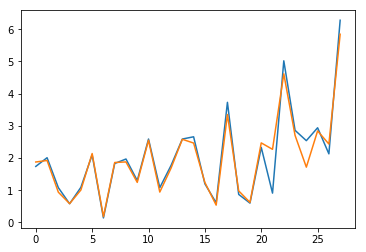

In [393]:
plt.plot(y_test_2.detach().numpy())# синяя
plt.plot(prediction.detach().numpy())# оранжевая

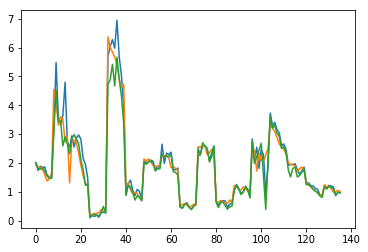

In [394]:
nn_model_2.eval() 
prediction = nn_model_2((Xall-mean)/sigm) 

plt.plot(Yall.detach().numpy())
plt.plot(prediction.detach().numpy())
plt.plot(EPS.detach().numpy())

 прогноз на t+1

In [395]:
comp=np.asarray([])
Xall_pred=np.asarray([]).reshape(-1,n_f)

for company, sub_df in df.groupby(['company']):
    XX=np.vstack([np.asarray(sub_df['EPS_ACT'].shift(-3)),np.asarray(sub_df['EPS_ACT'].shift(-2)), 
                  np.asarray(sub_df['EPS_ACT'].shift(-1)),np.asarray(sub_df['EPS_ACT'])]).T[0]
        
    Xall_pred=np.vstack([Xall_pred,XX])
    comp=np.append(comp,company)
 

In [396]:
nn_model_2.eval() 
pred = nn_model_2((torch.as_tensor(Xall_pred,dtype=torch.float32)-mean)/sigm) 

In [397]:
res2=pd.DataFrame({'company':comp,'EPS_ACT_t-1':Xall_pred[:,2],'EPS_ACT':Xall_pred[:,3],'nn_model prediction':np.round((pred.detach().numpy()).flatten(),decimals=2),'model0':np.round(model0,decimals=2)})
res2

,company,EPS_ACT_t-1,EPS_ACT,nn_model prediction,model0
0,ZES-AXP,1.74,2.01,2.01,2.03
1,ZES-BA,5.48,3.16,3.80,4.07
2,ZES-CAT,2.55,2.94,3.01,3.08
3,ZES-GE,0.17,0.14,0.18,0.15
4,ZES-GS,6.04,5.71,5.88,5.78
5,ZES-INTC,1.28,0.89,1.10,0.96
6,ZES-JNJ,1.97,2.10,2.20,2.14
7,ZES-JPM,1.98,2.65,2.52,2.64
8,ZES-KO,0.43,0.48,0.56,0.49
9,ZES-MMM,2.31,2.23,2.51,2.30


In [ ]:
для ZES-GE,ZES-KO лучше использовать линейную регрессию, т.к нейронная сеть ошибается  в значениях EPS меньше 0.5